In [1]:
import numpy as np 
import pandas as pd 
df = pd.read_csv('yield_df.csv')
df = df.drop(['Unnamed: 0'], axis=1)


In [2]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preprocessing

In [3]:
X=df.loc[:, df.columns != 'hg/ha_yield']
X = X.drop(['Year'], axis=1)
Y=df['hg/ha_yield']
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct1=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')
X=np.array(ct1.fit_transform(X))
X

array([[1.0, 0.0, 0.0, ..., 1996, 12004.33, 19.64],
       [0.0, 1.0, 0.0, ..., 1996, 12004.33, 19.64],
       [0.0, 0.0, 1.0, ..., 1996, 12004.33, 19.64],
       ...,
       [0.0, 0.0, 0.0, ..., 1083, 45620.0, 27.44],
       [0.0, 0.0, 0.0, ..., 1083, 45620.0, 27.44],
       [0.0, 0.0, 0.0, ..., 1083, 45620.0, 26.99]], dtype=object)

In [4]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
X[:,10]=le.fit_transform(X[:,10])
X

array([[1.0, 0.0, 0.0, ..., 1996, 12004.33, 19.64],
       [0.0, 1.0, 0.0, ..., 1996, 12004.33, 19.64],
       [0.0, 0.0, 1.0, ..., 1996, 12004.33, 19.64],
       ...,
       [0.0, 0.0, 0.0, ..., 1083, 45620.0, 27.44],
       [0.0, 0.0, 0.0, ..., 1083, 45620.0, 27.44],
       [0.0, 0.0, 0.0, ..., 1083, 45620.0, 26.99]], dtype=object)

In [5]:
yield_df_onehot=pd.DataFrame(X)
yield_df_onehot["hg/ha_yield"]=Y

In [6]:
yield_df_onehot.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,hg/ha_yield
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1996,12004.33,19.64,31400
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1996,12004.33,19.64,20052
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1996,12004.33,19.64,394286
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1996,12004.33,19.64,210685
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1996,12004.33,19.64,31111


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X) 

In [8]:
X

array([[1.        , 0.        , 0.        , ..., 0.60990906, 0.03263773,
        0.64856115],
       [0.        , 1.        , 0.        , ..., 0.60990906, 0.03263773,
        0.64856115],
       [0.        , 0.        , 1.        , ..., 0.60990906, 0.03263773,
        0.64856115],
       ...,
       [0.        , 0.        , 0.        , ..., 0.32361242, 0.12404003,
        0.92913669],
       [0.        , 0.        , 0.        , ..., 0.32361242, 0.12404003,
        0.92913669],
       [0.        , 0.        , 0.        , ..., 0.32361242, 0.12404003,
        0.91294964]])

# Model Development

### Data Splitting and Model Fitting

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [11]:
test_df=pd.DataFrame(x_test,columns=yield_df_onehot.loc[:, yield_df_onehot.columns != 'hg/ha_yield'].columns) 

In [12]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.764706,0.138915,0.021517,0.616547
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.941176,0.536218,0.938136,0.589928
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.147059,0.426152,0.017173,0.908633
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.058824,0.820006,0.041681,0.898561
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.000000,0.323612,0.125603,0.911871


### Model Comparision and Selection

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
#from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

#from sklearn.linear_model import ElasticNet
#from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge

from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
def compare_models(model):
    model_name = model.__class__.__name__
    fit=model.fit(x_train,y_train)
    y_pred=fit.predict(x_test)
    r2=r2_score(y_test,y_pred)
    return([model_name,r2])
    return
models = [LinearRegression(), RandomForestRegressor(),DecisionTreeRegressor(),GradientBoostingRegressor(), AdaBoostRegressor()\
    ,ExtraTreesRegressor(),BayesianRidge()]
model_train=list(map(compare_models,models)) 
print(*model_train, sep = "\n")


['LinearRegression', 0.6784745906613432]
['RandomForestRegressor', 0.9839458879759438]
['DecisionTreeRegressor', 0.9794086387128991]
['GradientBoostingRegressor', 0.9036107955720422]
['AdaBoostRegressor', 0.7092423981218265]
['ExtraTreesRegressor', 0.9847070216771822]
['BayesianRidge', 0.6784848390170964]


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
#from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

#from sklearn.linear_model import ElasticNet
#from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge

from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import classification_report

models = [LinearRegression(), RandomForestRegressor(),DecisionTreeRegressor(),GradientBoostingRegressor(), AdaBoostRegressor()\
    ,ExtraTreesRegressor(),BayesianRidge()]
for model in models: 
    model.fit(x_train,y_train)
    print(model)
    print("Accuracy on training set: ", model.score(x_train,y_train))
    print("Accuracy on testing set: ", model.score(x_test,y_test))

LinearRegression()
Accuracy on training set:  0.677309344457742
Accuracy on testing set:  0.6784745906613432
RandomForestRegressor()
Accuracy on training set:  0.9974768194101045
Accuracy on testing set:  0.9840424010561224
DecisionTreeRegressor()
Accuracy on training set:  0.9996459042938979
Accuracy on testing set:  0.9797617520288467
GradientBoostingRegressor()
Accuracy on training set:  0.9113005517554312
Accuracy on testing set:  0.9036107955720422
AdaBoostRegressor()
Accuracy on training set:  0.7052421855371847
Accuracy on testing set:  0.704031108217988
ExtraTreesRegressor()
Accuracy on training set:  0.9996459042486353
Accuracy on testing set:  0.9847358318870867
BayesianRidge()
Accuracy on training set:  0.6773092411334823
Accuracy on testing set:  0.6784848390170964


C:\Users\ska15\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


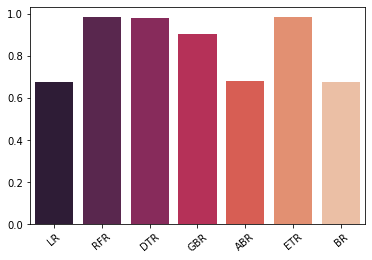

In [15]:
accuracy = []


models_ = ['LR','RFR','DTR','GBR','ABR','ETR','BR',]
for mod in models: 
    mod.fit(x_train,y_train)
    accuracy.append(mod.score(x_test,y_test))
sns.barplot(models_,  accuracy,x='Prediction Models', y='Accuracy Scores', palette = 'rocket')
plt.rcParams["figure.figsize"] = (10,10)
plt.xticks(rotation = 40)
#plt.ylabel("Accuracy Score")
#plt.xlabel("Prediction Models")
plt.show()

# Final Model

#### We Chose Extra Trees Regressor after comparing accuracy and R2 Scores

In [16]:
from sklearn.ensemble import ExtraTreesRegressor
clf=ExtraTreesRegressor()
model=clf.fit(x_train,y_train)

test_df["yield_predicted"]= model.predict(x_test)
test_df["yield_actual"]=pd.DataFrame(y_test)["hg/ha_yield"].tolist()

In [17]:
y_true = y_test 
y_pred = model.predict(x_test)
from sklearn.metrics import  accuracy_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import confusion_matrix
mse = mean_squared_error(y_true,y_pred)
mae = mean_absolute_error(y_true,y_pred)
acc = model.score(x_test,y_test)
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("Accuracy Score: ", acc)

Mean Squared Error:  112389115.34444849
Mean Absolute Error:  3708.775302957634
Accuracy Score:  0.9847752004804826


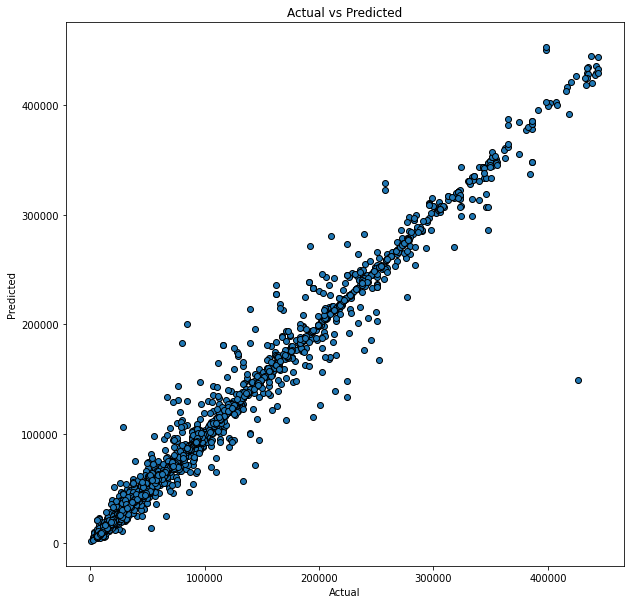

In [18]:
fig, ax = plt.subplots() 
plt.rcParams["figure.figsize"] = (10,10)
ax.scatter(test_df["yield_actual"], test_df["yield_predicted"],edgecolors=(0, 0, 0))

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

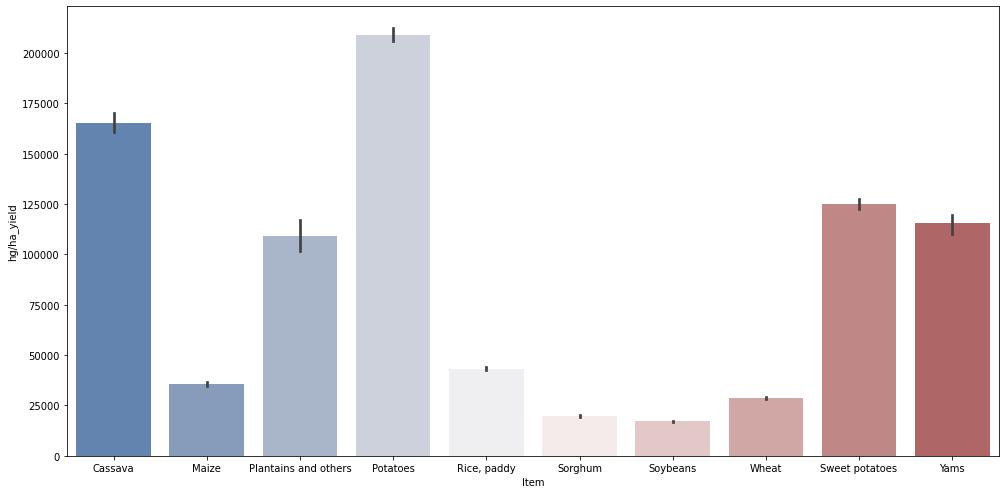

In [19]:
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x="Item",y="hg/ha_yield",palette="vlag",data=df,ax=ax);

# Prediction

In [22]:
Area=input("Enter the Indian State:")
def let_user_pick(options):
    print("Please choose:")
    for idx, element in enumerate(options):
        print("{}) {}".format(idx + 1, element))
    i = input("Choose a Crop to predict Yield: ")
    try:
        if 0 < int(i) <= len(options):
            return int(i) - 1
    except:
        pass
    return None
options = ["Cassava", "Maize", "Potatoes","Rice, paddy","Sorghum","Soybeans","Wheat","Sweet potatoes","Yams"]
res = let_user_pick(options)
Item = options[res]
#Item=input("Enter the Crop Name:")
Year=input("Enter the Year:")
average_rain_fall_mm_per_year=input("Enter average rainfall (in mm):")
pesticides_tonnes=input("Enter amount of Pesticides (in tonnes):")
avg_temp=input("Enter the average temperature (in Celcius): ")

inputs=np.array([[Area,Item,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp]])
inputs=np.array(ct1.transform(inputs))
inputs[:,10]=le.transform(inputs[:,10])
inputs=scaler.transform(inputs)

prediction=model.predict(inputs)
print("Predicted hg/ha_yield is (Yield Per Hectare) is",prediction[0])

Enter the Indian State:Kerala
Please choose:
1) Cassava
2) Maize
3) Potatoes
4) Rice, paddy
5) Sorghum
6) Soybeans
7) Wheat
8) Sweet potatoes
9) Yams
Choose a Crop to predict Yield: 2
Enter the Year:2011
Enter average rainfall (in mm):1200
Enter amount of Pesticides (in tonnes):25000
Enter the average temperature (in Celcius): 23.22
Predicted hg/ha_yield is (Yield Per Hectare) is 18358.38


C:\Users\ska15\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
